참고 : https://velog.io/@_ubuntu/Dacon-%EC%99%80%EC%9D%B8-%ED%92%88%EC%A7%88-%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('./winequality-red.csv')
# df.head()

# 데이터 확인
print("Train shape : ", df.shape)
df.info()

Train shape :  (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1599개의 데이터가 있고 12개의 feature가 있다. 

In [3]:
# 결측치 체크(이 데이터는 결측치가 거의 없음)

print("결측치 개수:\n", df.isnull().sum())

결측치 개수:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


데이터에 결측치는 없다.

<Figure size 2000x1000 with 0 Axes>

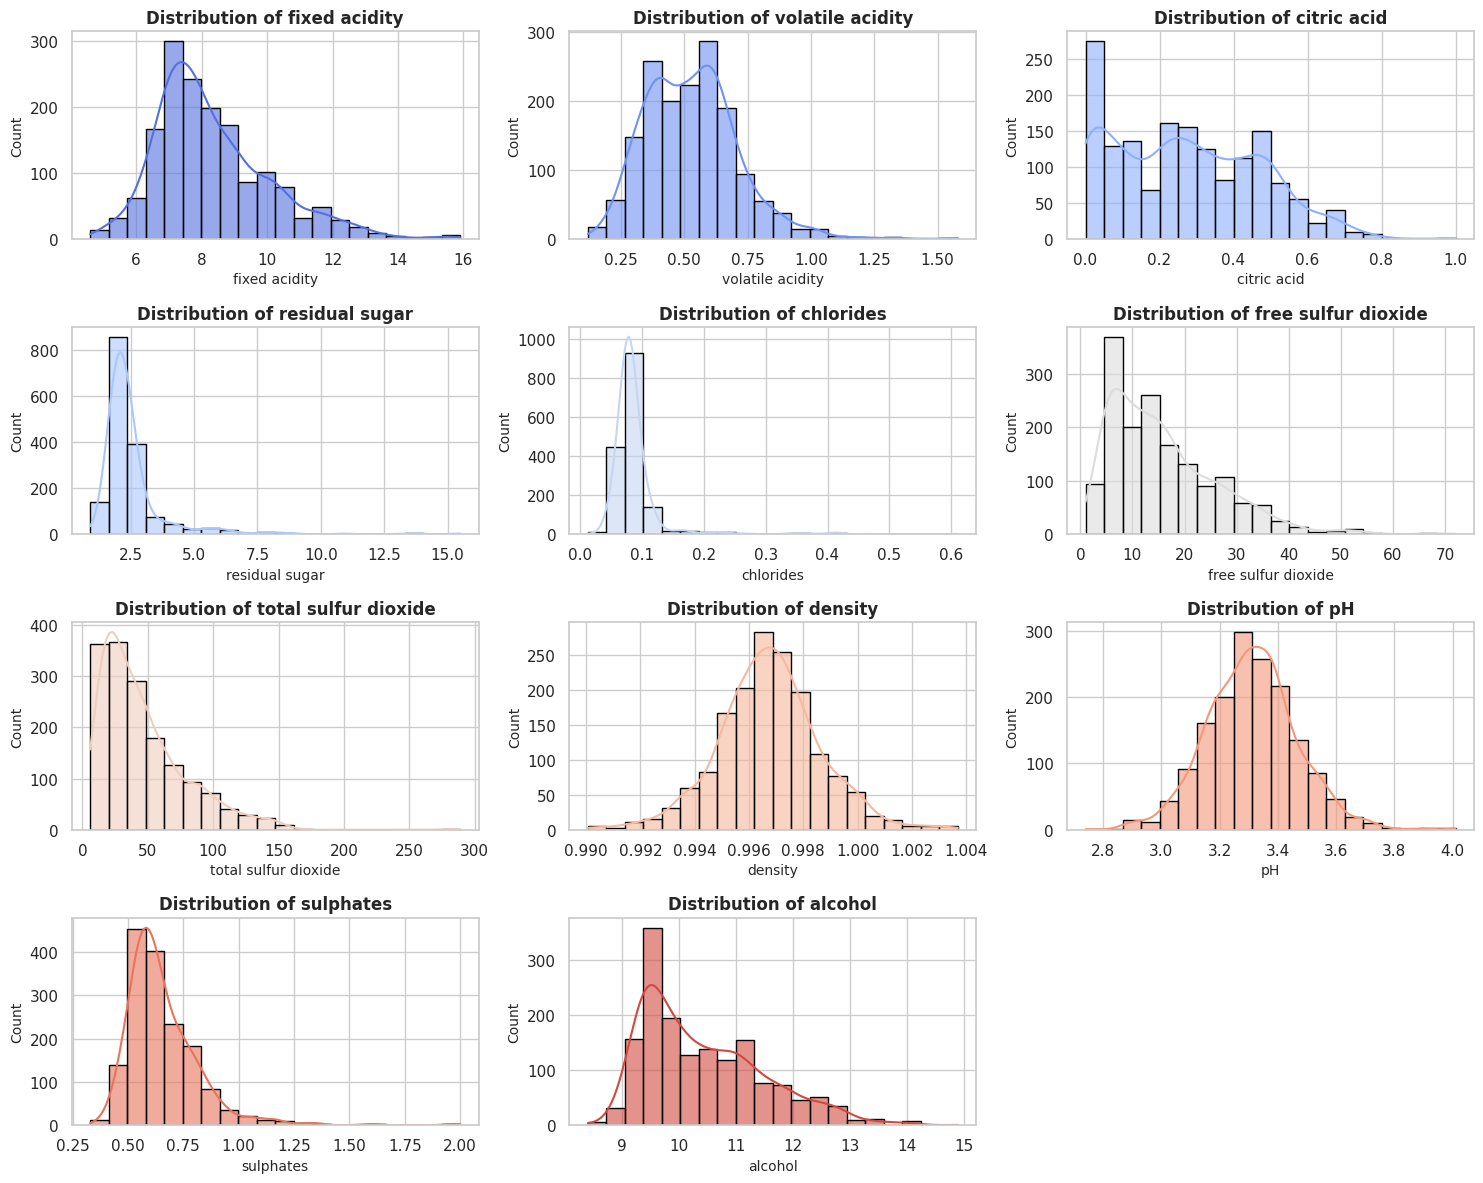

In [4]:
# 각 변수(‘pH’, ‘alcohol’, ‘sulphates’ 등) 분포 히스토그램 그려보기
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))

features = df.columns[:-1]

num_features = len(features)
rows = num_features // 3 + 1

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=20, kde=True, color=sns.color_palette("coolwarm", num_features)[i],
                 edgecolor='black', alpha=0.6,  ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


히스토그램은 그래프가 종모양에 가까울 수록 좋은 데이터이다.  
density (밀도), pH (수소 이온 농도 지수)  
  
참고 : https://docs.kanaries.net/ko/topics/Pandas/pandas-plot-histogram  
참고 : https://wikidocs.net/92112

<Axes: >

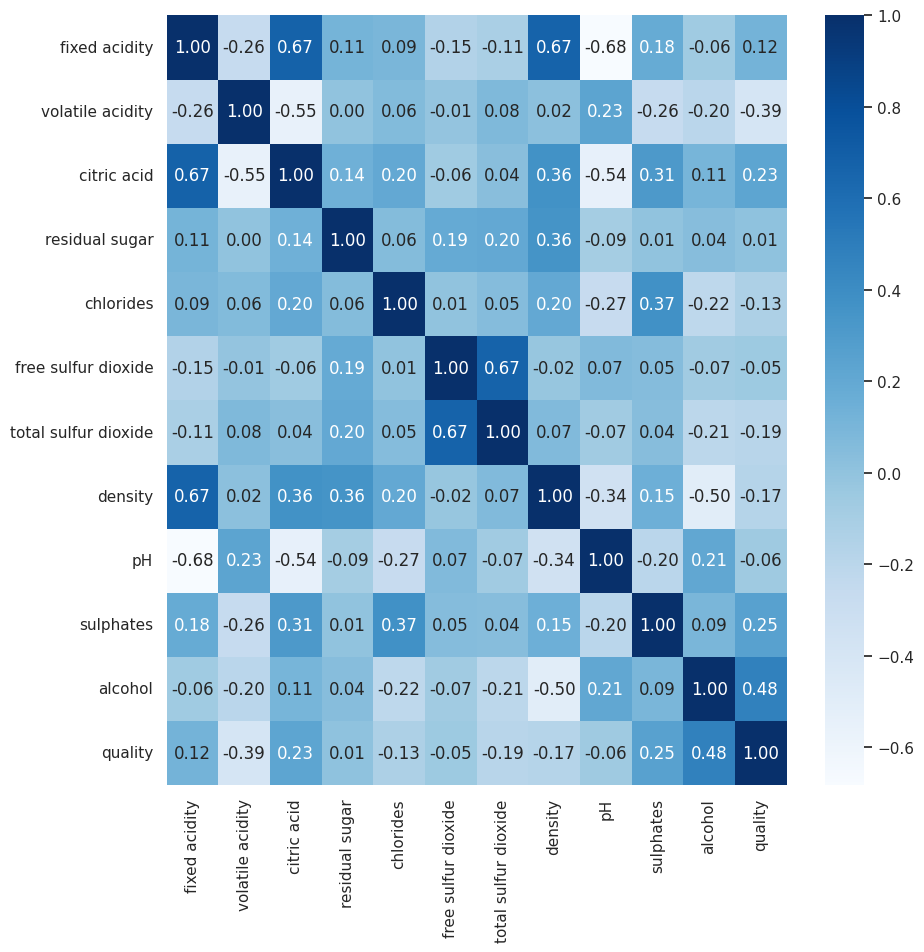

In [5]:
# 상관계수(corr) 확인하여, 어떤 변수가 품질 점수와 밀접한지 파악

corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'Blues')

fixed actidity (고정된 산도)  
volatile acidity (휘발성 산도)  
citric acid (구연산)  
residual sugar (잔여 설탕)  
chlorides (염화물)  
free sulfur dioxide (자유 이산화황)  
total sulfur dioxide (총 이산화황)  
density (밀도)  
pH (수소 이온 농도 지수)  
sulphates (황산염)  
alcohol (알코올)  
quality (품질)  
  
  
** 품질과 가장 높은 상관관계 (양의 상관관계)  
  
alcohol(알코올 : 0.48), sulphates(황산염 : 0.25) - 알코올 도수가 높고 황산염이 많을 수록 좋은 품질일 확률 up!  
  
** 품질과 가장 낮은 상관관계 (음의 상관관계)  
  
sulphates(휘발성 산도 : -0.39) - 휘발성 산도가 높을 수록 품질이 낮아질 확률이 높음  
  
참고 : https://docs.kanaries.net/ko/topics/Pandas/pandas-plot-histogram  
참고 : https://wikidocs.net/92112  

In [6]:
# 필요하면 **회귀분석(OLS)**으로 유의미한 변수 파악
# OLS(Ordinary Least Squares) 회귀분석은 가장 기본적인 회귀분석 방법 중 하나로,
# 잔차제곱합(RSS)을 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법
import statsmodels.api as sm

X = df.drop(columns=['quality'])
y = df['quality']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()  # OLS 회귀 분석 모델 생성 및 학습

# 📌 회귀 분석 결과를 보기 쉽게 정리 (중요한 변수만 출력)
summary_df = pd.DataFrame(model.summary().tables[1].data[1:], columns=model.summary().tables[1].data[0])
summary_df.columns = ["Variable", "Coefficient", "Std Err", "t-Value", "P-Value", "[0.025", "0.975]"]
summary_df = summary_df.drop(columns=["Std Err", "t-Value", "[0.025", "0.975]"])  # 불필요한 칼럼 제거
summary_df["P-Value"] = summary_df["P-Value"].astype(float)  # 숫자로 변환

# 유의미한 변수만 출력 (P-값이 0.05 미만인 경우)
significant_vars = summary_df[summary_df["P-Value"] < 0.05]
display(significant_vars)


,Variable,Coefficient,P-Value
2,volatile acidity,-1.0836,0.000
5,chlorides,-1.8742,0.000
6,free sulfur dioxide,0.0044,0.045
7,total sulfur dioxide,-0.0033,0.000
9,pH,-0.4137,0.031
10,sulphates,0.9163,0.000
11,alcohol,0.2762,0.000


선형회귀 참고 : https://tensorflow.blog/2018/11/15/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-%EC%A0%95%EC%A3%BC%ED%96%89-1-linearregression/  
train_text 참고 : https://yhyun225.tistory.com/16   
logistic 오류 참고 : https://nsbg.tistory.com/entry/Sklearn-ConvergenceWarning-lbfgs-failed-to-converge-status1  
  
위 표에서 coefficient는 회귀 계수로 종속 변수(quality)와의 관계를 나타낸다.  
volatile acidity가 1씩 증가할 때 품질 점수는 약 -1.0836만큼 감소한다는 의미.  
alcohol은 1씩 증가할 때 품질 점수가 0.2762만큼 증가한다는 의미.  
  
그리고 P>|t| 값이 0.05보다 작은게 총 6가지로 그 중에서  
'chlorides', 'free sulfur dioxide', 'sulphates', 'sulphates', 'alcohol'은 품질에 긍정적인 영향을 주고
'volatile_acidity'랑 'total_sulfur_dioxide'는 품질에 부정적인 영향을 미침.


[다중공선성 (VIF)]이 확인됨  
  
다중공선성이란 ?  
통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제  
OLS 회귀분석에서는 다중공선성이 높으면 모델의 신뢰성이 낮아질 수 있기 때문에 제외시켜주는게 좋다.  
  
alcohol이 다중공선성이 높지만 완전 제외시키기에는 모델의 설명력이 부족해져서 (설명력 : 0.336  -> 0.177 / 다중공선성 :  113 -> 11.5 로 엄청 안정화 되긴 함.)  
모델 성능을 위해 alcohol을 표준화(StanderdScaler())한 후 다시 추가 (설명력 : 0.175 -> 0.335 / 다중공산성 : 11.5 -> 11.6 )  
  
  
참고 : https://xiang32.tistory.com/13   
참고 : https://ysyblog.tistory.com/119  

,Model,RMSE (Root Mean Squared Error),MAE (Mean Absolute Error),R^2 Score (Explained Variance)
0,Linear Regression,0.624520,0.503530,0.403180
1,Random Forest,0.550889,0.425344,0.535614


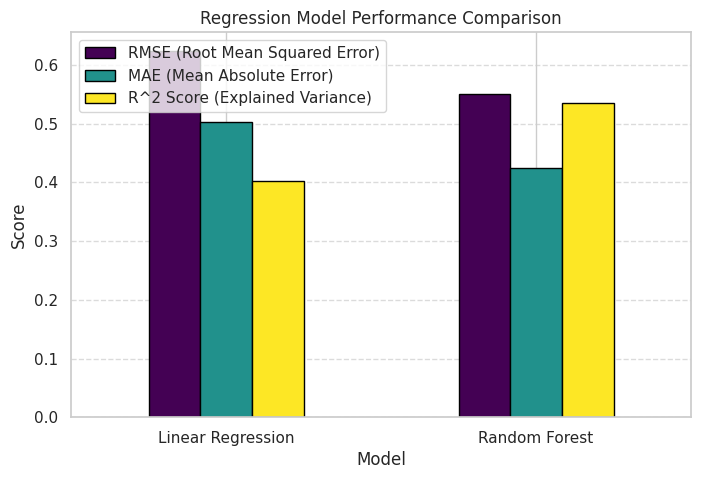

In [7]:
# 회귀: LinearRegression, RandomForestRegressor 등으로 연속형 품질 점수 예측

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습 및 평가
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 랜덤 포레스트 회귀 모델 학습 및 평가
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 회귀 모델 성능 비교
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE (Root Mean Squared Error)": [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))],
    "MAE (Mean Absolute Error)": [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)],
    "R^2 Score (Explained Variance)": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
})

# 📌 회귀 모델 비교 결과 출력
display(metrics)

# 📊 회귀 모델 성능 시각화
metrics.set_index("Model").plot(kind="bar", figsize=(8, 5), colormap="viridis", edgecolor="black")
plt.title("Regression Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

,Metric,Score
0,Accuracy,0.790625
1,Precision,0.811111
2,Recall,0.815642


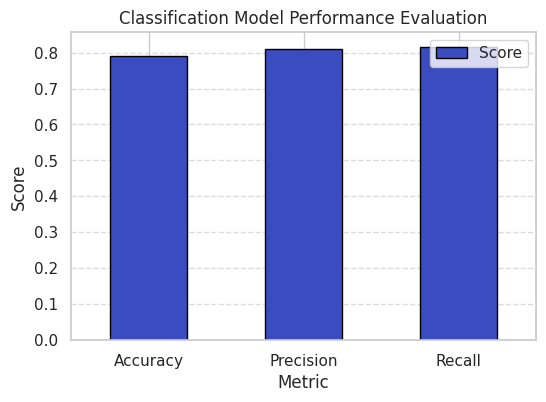

In [8]:
# 분류: 품질 점수를 “6점 이상=Good, 미만=Not Good” 등으로 나눠서 RandomForestClassifier 실행

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_class = (df["quality"] >= 6).astype(int)  # 품질이 6점 이상이면 1, 미만이면 0
X = df.drop(columns=["quality"])
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_class)
y_pred_class = rf_clf.predict(X_test)

# 분류 모델 평가 지표 계산
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# 📌 분류 모델 평가 결과 출력
classification_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall"],
    "Score": [accuracy, precision, recall]
})
display(classification_results)

# 📊 분류 모델 성능 시각화
classification_results.set_index("Metric").plot(kind="bar", figsize=(6, 4), colormap="coolwarm", edgecolor="black")
plt.title("Classification Model Performance Evaluation")  # Title in English
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

분류 모델이 정확도 성능이 높게 나옴.  

In [26]:

# 1. 비율 변수: 알콜과 밀도의 비율
df['alcohol_density_ratio'] = df['alcohol'] / df['density']

# 2. 상호작용 변수: sulphates와 citric acid의 곱
df['sulphates_citric'] = df['sulphates'] * df['citric acid']

# 3. 차이 변수: free sulfur dioxide와 total sulfur dioxide의 차이
df['free_total_sulfur_diff'] = df['free sulfur dioxide'] - df['total sulfur dioxide']

# 4. 스케일링 변수: alcohol과 acidity 변수의 표준화
df['scaled_alcohol'] = (df['alcohol'] - df['alcohol'].mean()) / df['alcohol'].std()
df['scaled_acidity'] = (df['fixed acidity'] - df['fixed acidity'].mean()) / df['fixed acidity'].std()

# 5. 다항식 특성: alcohol과 acidity의 제곱 추가
df['alcohol_squared'] = df['alcohol'] ** 2
df['acidity_squared'] = df['fixed acidity'] ** 2

# 새로 생성된 변수들 확인
print(df[['alcohol_density_ratio', 'sulphates_citric', 'free_total_sulfur_diff',
          'scaled_alcohol', 'scaled_acidity', 'alcohol_squared', 'acidity_squared']].head())

   alcohol_density_ratio  sulphates_citric  free_total_sulfur_diff  \
0               9.420726            0.0000                   -23.0   
1               9.831461            0.0000                   -42.0   
2               9.829488            0.0260                   -39.0   
3               9.819639            0.3248                   -43.0   
4               9.420726            0.0000                   -23.0   

   scaled_alcohol  scaled_acidity  alcohol_squared  acidity_squared  
0       -0.959946       -0.528194            88.36            54.76  
1       -0.584594       -0.298454            96.04            60.84  
2       -0.584594       -0.298454            96.04            60.84  
3       -0.584594        1.654339            96.04           125.44  
4       -0.959946       -0.528194            88.36            54.76  


회귀 모델 성능:
               Model      RMSE       MAE        R²
0  Linear Regression  0.622072  0.499783  0.407849
1      Random Forest  0.562926  0.428000  0.515099


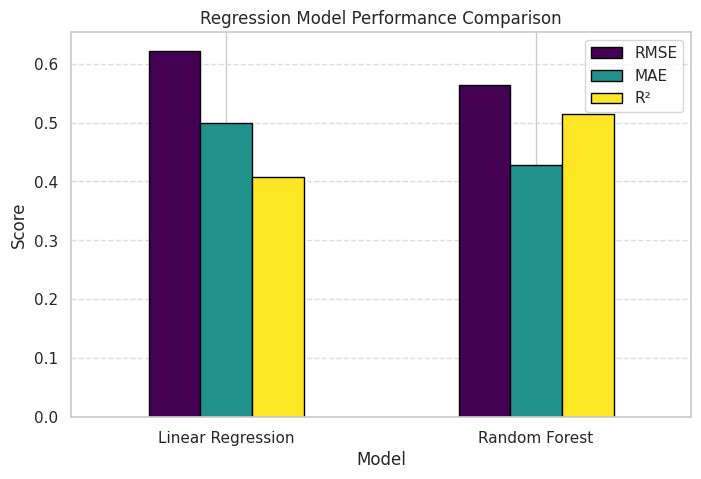

In [10]:
# 1. Feature Engineering: 새 변수 추가
df['alcohol_density_ratio'] = df['alcohol'] / df['density']
df['sulphates_citric'] = df['sulphates'] * df['citric acid']
df['free_total_sulfur_diff'] = df['free sulfur dioxide'] - df['total sulfur dioxide']
df['scaled_alcohol'] = (df['alcohol'] - df['alcohol'].mean()) / df['alcohol'].std()
df['scaled_acidity'] = (df['fixed acidity'] - df['fixed acidity'].mean()) / df['fixed acidity'].std()
df['alcohol_squared'] = df['alcohol'] ** 2
df['acidity_squared'] = df['fixed acidity'] ** 2

# 2. 회귀 모델: 품질 예측
X = df.drop(columns=['quality'])
y = df['quality']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 랜덤 포레스트 회귀 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 성능 평가 (회귀 모델)
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))],
    "MAE": [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)],
    "R²": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
})

# 회귀 모델 성능 출력
print("회귀 모델 성능:")
print(metrics)

# 성능 시각화
metrics.set_index("Model").plot(kind="bar", figsize=(8, 5), colormap="viridis", edgecolor="black")
plt.title("Regression Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

분류 모델 성능:
      Metric     Score
0   Accuracy  0.787500
1  Precision  0.813559
2     Recall  0.804469


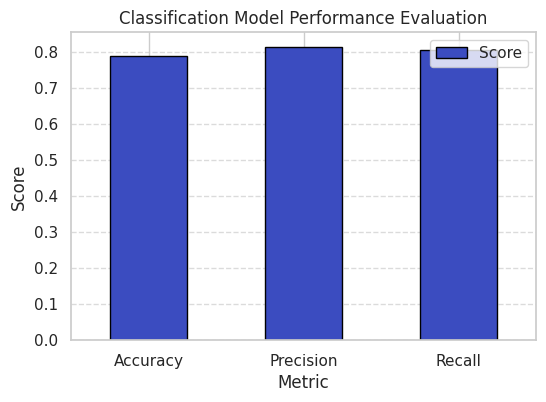

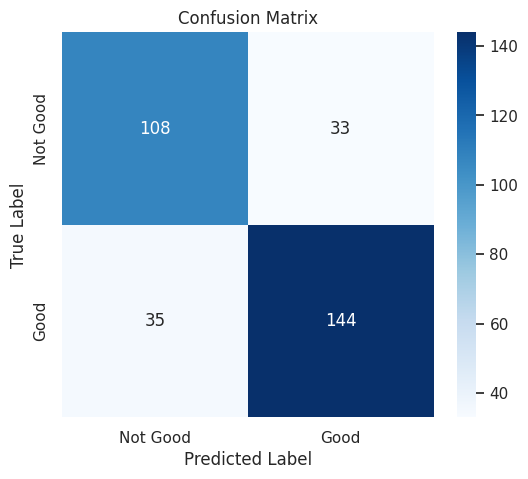

In [ ]:
# 분류 모델: 품질이 6 이상이면 "좋음(1)", 미만이면 "나쁨(0)"으로 구분
y_class = (df["quality"] >= 6).astype(int)

# 데이터 분할
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_class)
y_pred_class = rf_clf.predict(X_test)

# 성능 평가 (분류 모델)
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

classification_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall"],
    "Score": [accuracy, precision, recall]
})

# 분류 모델 성능 출력
print("분류 모델 성능:")
print(classification_results)

# 성능 시각화
classification_results.set_index("Metric").plot(kind="bar", figsize=(6, 4), colormap="coolwarm", edgecolor="black")
plt.title("Classification Model Performance Evaluation")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 4. 혼동 행렬 시각화 (분류 모델)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# XGBoost 모델 정의
xgb_model = xgb.XGBClassifier(random_state=42)

# GridSearchCV를 사용하여 하이퍼파라미터 최적화
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.8}


XGBoost 모델 성능:
Accuracy: 0.8031
Precision: 0.8258
Recall: 0.8212


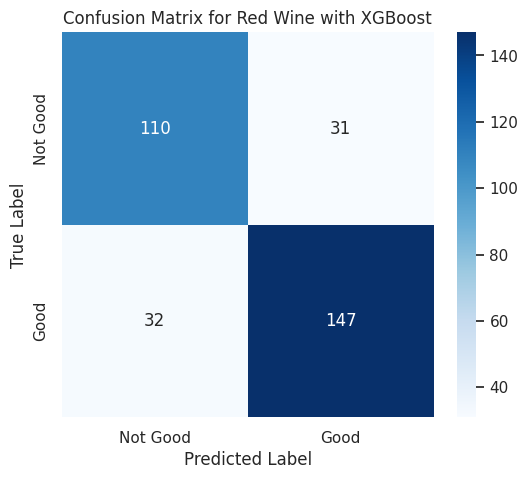

In [33]:
# XGBoost 모델 테스트
import xgboost as xgb

# 품질 점수 이진 분류로 변환 (6점 이상 -> 1, 미만 -> 0)
df['quality_class'] = (df['quality'] >= 6).astype(int)

# 특성과 라벨 분리
X = df.drop(columns=['quality', 'quality_class'])
y = df['quality_class']

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 성능 평가 (정확도, 정밀도, 재현율)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# 성능 결과 출력
print("XGBoost 모델 성능:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Red Wine with XGBoost")
plt.show()

정확도가 분류 모델에서 79%, 정밀도 81%, 재현율 81% 였는데  
Gradient Boosting 중에 XGBoost 모델로 테스트하니  
정확도 80%, 정밀도 82%, 재현율 82%로 1% 정도 증가하였다.  

XGBoost 모델 성능:  
Accuracy: 0.8031  
Precision: 0.8258  
Recall: 0.8212  

In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 데이터 스케일링 적용
scaler = StandardScaler()

# X_train, X_test 데이터를 스케일링
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 여러 모델 정의
model1 = XGBClassifier(random_state=42)
model2 = LogisticRegression(random_state=42, max_iter=500)  # max_iter 값을 500으로 설정
model3 = SVC(random_state=42)

# 모델 앙상블 (Voting Classifier)
ensemble_model = VotingClassifier(estimators=[('xgb', model1), ('lr', model2), ('svc', model3)], voting='hard')

# 앙상블 모델 학습
ensemble_model.fit(X_train_scaled, y_train)

# 예측
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# 성능 평가
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.4f}")

Ensemble Model Accuracy: 0.7719


앙상블 모델로
- model1: XGBClassifier (XGBoost 모델)
- model2: LogisticRegression (로지스틱 회귀 모델)
- model3: SVC (서포트 벡터 머신 모델)
을 적용하고 파라미터도 조정하고 스케일링도 했지만 XGBoost 보다 성능이 떨어짐


In [16]:
# 화이트 와인 데이터 불러오기
white_df = pd.read_csv("./winequality-white.csv", delimiter=';')

# 화이트 와인 데이터 확인
white_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


4898개의 데이터, 11개의 컬럼 존재

In [17]:
# 결측치 체크(이 데이터는 결측치가 거의 없음)

print("결측치 개수:\n", white_df.isnull().sum())

결측치 개수:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


결측치 없음

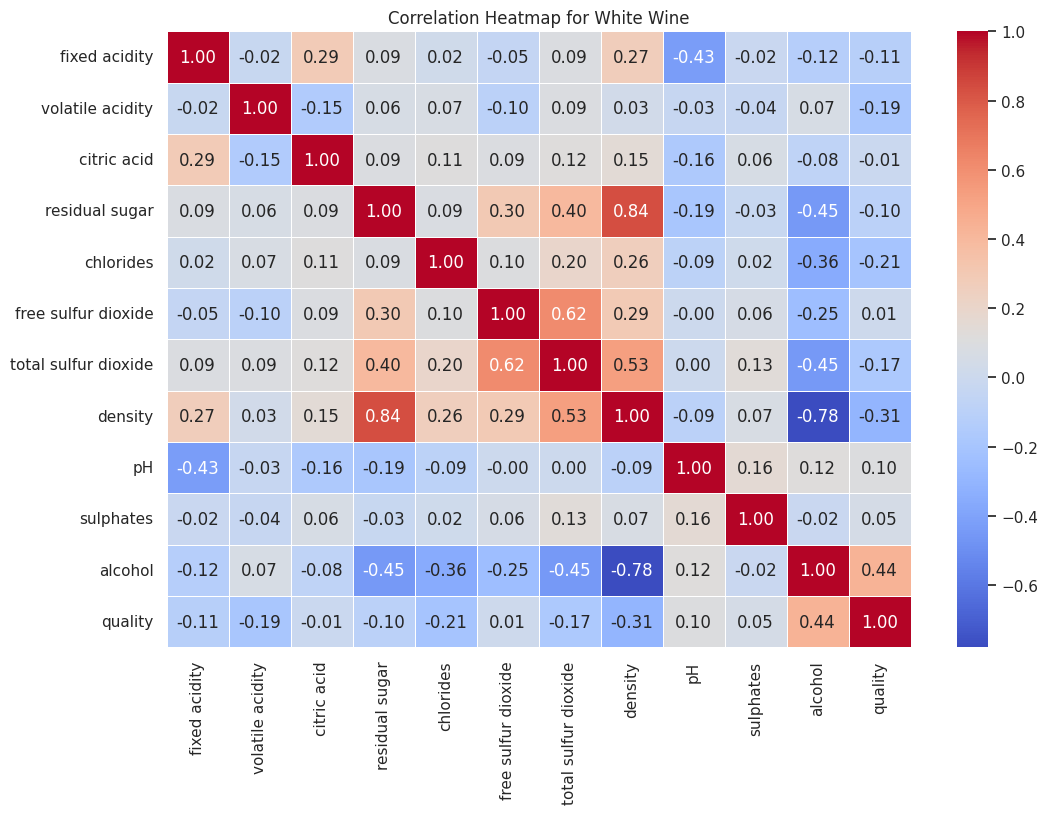

In [19]:
# 화이트 와인의 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(white_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for White Wine")
plt.show()

fixed actidity (고정된 산도)  
volatile acidity (휘발성 산도)  
citric acid (구연산)  
residual sugar (잔여 설탕)  
chlorides (염화물)  
free sulfur dioxide (자유 이산화황)  
total sulfur dioxide (총 이산화황)  
density (밀도)  
pH (수소 이온 농도 지수)  
sulphates (황산염)  
alcohol (알코올)  
quality (품질)  

In [20]:
# 필요하면 **회귀분석(OLS)**으로 유의미한 변수 파악
# OLS(Ordinary Least Squares) 회귀분석은 가장 기본적인 회귀분석 방법 중 하나로,
# 잔차제곱합(RSS)을 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법
import statsmodels.api as sm

X = white_df.drop(columns=['quality'])
y = white_df['quality']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()  # OLS 회귀 분석 모델 생성 및 학습

# 📌 회귀 분석 결과를 보기 쉽게 정리 (중요한 변수만 출력)
summary_df = pd.DataFrame(model.summary().tables[1].data[1:], columns=model.summary().tables[1].data[0])
summary_df.columns = ["Variable", "Coefficient", "Std Err", "t-Value", "P-Value", "[0.025", "0.975]"]
summary_df = summary_df.drop(columns=["Std Err", "t-Value", "[0.025", "0.975]"])  # 불필요한 칼럼 제거
summary_df["P-Value"] = summary_df["P-Value"].astype(float)  # 숫자로 변환

# 유의미한 변수만 출력 (P-값이 0.05 미만인 경우)
significant_vars = summary_df[summary_df["P-Value"] < 0.05]
display(significant_vars)


,Variable,Coefficient,P-Value
0,const,150.1928,0.000
1,fixed acidity,0.0655,0.002
2,volatile acidity,-1.8632,0.000
4,residual sugar,0.0815,0.000
6,free sulfur dioxide,0.0037,0.000
8,density,-150.2842,0.000
9,pH,0.6863,0.000
10,sulphates,0.6315,0.000
11,alcohol,0.1935,0.000


** 긍정적 영향  
fixed acidity (고정 산도) : 고정 산도가 1씩 증가할 때 품질 점수는 0.0655만큼 증가하여 긍정적인 영향  
residual sugar (잔여 설탕) : 잔여 설탕이 1 증가할때 품질 점수는 0.0815만큼 증가하여 긍정적인 영향  
free sulfur dioxide (자유 황산화물) : 자유 황산화물이 1 증가할때 품질 점수는 0.0037만큼 증가하여 긍정적인 영향  
pH(산성도) : 산성도가 1 증가하면 품질 점수는 0.6863만큼 증가하여 긍정적 영향  
sulphates (황산염) : 황산염이 1 증가할때 품질은 약 0.6315만큼 증가하여 긍정적인 영향  
alcohol (알코올) : 알코올이 1 증가할때 0.1925만큼 증가  
  
  
** 부정적 영향
volatile acidity (휘발성 산도) : 휘발성 산도가 1씩 증가할때 품질 점수는 약 1.86만큼 감소하여 부정적인 영향  
density (밀도) : 밀도가 1 증가할때 품질 점수는 약 150.28만큼 감소하여 부정적 영향을 미침  


In [ ]:
# 화이트 와인 모델 (회귀) 학습
white_X = white_df.drop(columns=['quality'])
white_y = white_df['quality']
white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_X, white_y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 학습
white_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
white_rf_model.fit(white_X_train, white_y_train)
white_y_pred = white_rf_model.predict(white_X_test)

# 성능 지표 계산 (화이트 와인)
white_metrics = pd.DataFrame({
    "Model": ["Random Forest (White Wine)"],
    "RMSE": [np.sqrt(mean_squared_error(white_y_test, white_y_pred))],
    "MAE": [mean_absolute_error(white_y_test, white_y_pred)],
    "R^2 Score": [r2_score(white_y_test, white_y_pred)]
})

# 레드 와인 모델 성능 비교
# 기존의 레드 와인 모델 (회귀)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
red_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
red_rf_model.fit(X_train, y_train)
y_pred_red = red_rf_model.predict(X_test)

# 성능 지표 계산 (레드 와인)
red_metrics = pd.DataFrame({
    "Model": ["Random Forest (Red Wine)"],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_red))],
    "MAE": [mean_absolute_error(y_test, y_pred_red)],
    "R^2 Score": [r2_score(y_test, y_pred_red)]
})

# 성능 비교
comparison_metrics = pd.concat([red_metrics, white_metrics], ignore_index=True)

# 결과를 출력
display(comparison_metrics)

,Model,RMSE,MAE,R^2 Score
0,Random Forest (Red Wine),0.587945,0.416969,0.553659
1,Random Forest (White Wine),0.589708,0.418520,0.550978


아마도 데이터형식이 비슷해서 그런지 두 와인 다 회귀 모델별 큰 차이는 없다.

분류 모델 성능:
                        Model  Accuracy  Precision    Recall
0    Random Forest (Red Wine)  0.790625   0.811111  0.815642
1  Random Forest (White Wine)  0.841837   0.870588  0.898331


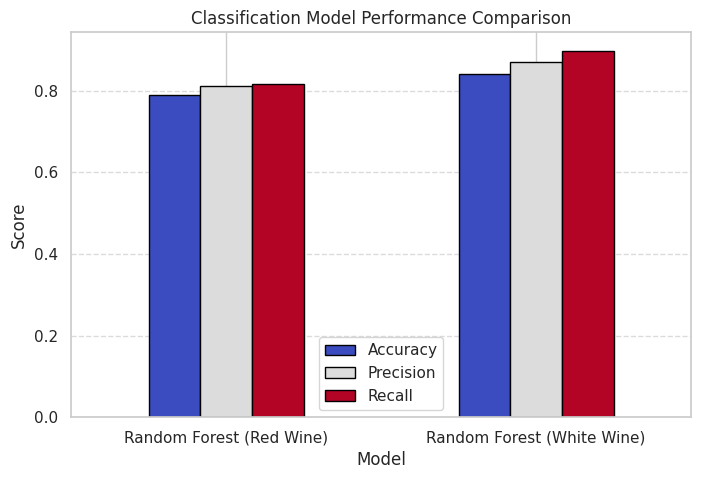

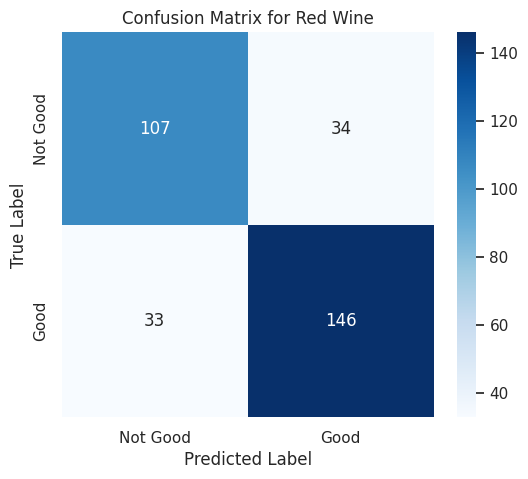

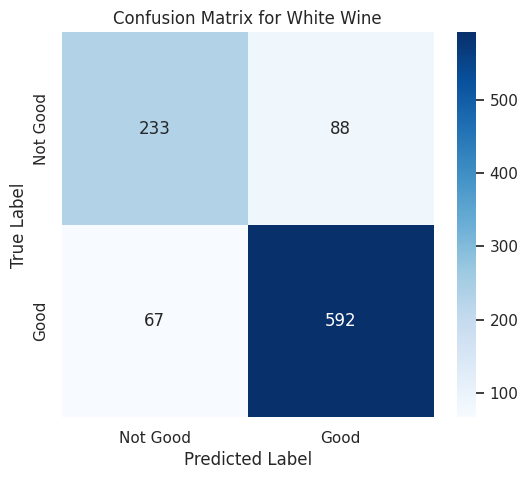

In [25]:
# 레드 와인 데이터 불러오기 (구분자: 기본값 ',')
red_df = pd.read_csv('./winequality-red.csv')

# 화이트 와인 데이터 불러오기 (구분자: ';')
white_df = pd.read_csv("./winequality-white.csv", delimiter=';')

# 품질 점수를 이진 분류로 변환 (6점 이상 -> 1, 미만 -> 0)
red_df['quality_class'] = (red_df['quality'] >= 6).astype(int)
white_df['quality_class'] = (white_df['quality'] >= 6).astype(int)

# 특성과 라벨 분리
X_red = red_df.drop(columns=['quality', 'quality_class'])
y_red = red_df['quality_class']

X_white = white_df.drop(columns=['quality', 'quality_class'])
y_white = white_df['quality_class']

# 데이터 분할 (80% 학습, 20% 테스트)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 학습
rf_clf_red = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_red.fit(X_train_red, y_train_red)

rf_clf_white = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_white.fit(X_train_white, y_train_white)

# 예측
y_pred_red = rf_clf_red.predict(X_test_red)
y_pred_white = rf_clf_white.predict(X_test_white)

# 성능 평가 (정확도, 정밀도, 재현율)
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, precision, recall

# 레드 와인 모델 성능
accuracy_red, precision_red, recall_red = evaluate_model(y_test_red, y_pred_red)

# 화이트 와인 모델 성능
accuracy_white, precision_white, recall_white = evaluate_model(y_test_white, y_pred_white)

# 성능 결과 출력
classification_results = pd.DataFrame({
    "Model": ["Random Forest (Red Wine)", "Random Forest (White Wine)"],
    "Accuracy": [accuracy_red, accuracy_white],
    "Precision": [precision_red, precision_white],
    "Recall": [recall_red, recall_white]
})

# 결과 출력
print("분류 모델 성능:")
print(classification_results)

# 성능 시각화
classification_results.set_index("Model").plot(kind="bar", figsize=(8, 5), colormap="coolwarm", edgecolor="black")
plt.title("Classification Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 혼동 행렬 시각화 (레드 와인)
conf_matrix_red = confusion_matrix(y_test_red, y_pred_red)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_red, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Red Wine")
plt.show()

# 혼동 행렬 시각화 (화이트 와인)
conf_matrix_white = confusion_matrix(y_test_white, y_pred_white)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_white, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Good", "Good"], yticklabels=["Not Good", "Good"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for White Wine")
plt.show()

분류 모델이 화이트 와인에서도 정확도가 가장 높고 정밀도와 재현율은 두 와인 다 비슷함.  
  
혼동행렬 : 모델이 예측한 값과 실제 값을 비교한 것  
- true positive (진짜 긍정적) : 실제로 good, 모델도 good  
- false positive (가짜 긍정적) : 실제로 not good, 모델은 good  
- true negaive (진짜 부정적) : 실제로 not good, 모델도 not good  
- fales negaive (가짜 부정적) : 실제로 good, 모델은 not good  
  
* 레드와인  
true positive - 146 (45%)  
false positive - 34 (10%)  
true negative - 107 (33%)  
false negative - 33 (10%)  
  
* 화이트와인  
true positive - 592 (60%)  
false positive - 88 (8%)  
true negative - 233 (23%)  
false negative - 67 (6%)  
  
화이트 와인이 혼동 행렬에서 false positive 와 false negarive를 줄이는데 더 나은 성능을 보여줌.